In [28]:
import os, sys
import pathlib
import os
print(os.getcwd()) #print working dir
# os.chdir(os.path.dirname(sys.path[0]))
# os.chdir("..")
print(os.getcwd()) #print working dir
from importlib import reload
os.sys.path.insert(0, './src')
import analyze_utilities_v2
reload(analyze_utilities_v2)

import matplotlib.pyplot as plt

output_path = './results/imagenet/figures'
is_plot_title = False
is_save_fig = True


c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml
c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml
c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml


# 1. Imagenet results paths

    # All tests were performed on the imagenet evaluation subset which includes all the samples for the first 100 classes (50 samples per each class for a total of 5000 samples).
    #
    # Experiments:
    # 1. pNML Accuracy Vs. Refinement strength (\lambda) - Shows the trade-off between natural and robust accuracy
    # 2. Accuracy Vs. PGD-attack strength (\epsilon); with\ without  pNML - Shows that pNML improve accuracy.
    # 3. Accuracy Vs. Adaptive-attack & PGD-attack strength (\epsilon) - Shows that adaptive attack is not working
    # 4. TODO: blackbox attack Accuracy Vs. Blackbox-attack for different epsilons strength (\epsilon) - Shows that pNML improve accuracy compared to blackbox without pNML
    # PGD attack properties: "pgd_iter": 50, "pgd_step": 0.00392156862, "pgd_test_restart_num": 10
    # For 1. "epsilon": 0.0156862745098 was selected.
    # For 2. lambda = 0.01176 (refinement strength)
    # For 3. "epsilon": [0.0156, 0.0313, 0.0627] was selected.; lambda = 0.01176(refinement strength). indices: 1 per label, 100 in total.

### 1.1. pNML Accuracy Vs. Refinement strength (\lambda)

In [15]:
natural_acc_vs_lambda_res_path = "l"
pgd_acc_vs_lambda_res_path = ""

### 1.2.  Accuracy Vs. attack strength (\epsilon); with\ without  pNML 

In [16]:
pgd_nopnml_diff_eps_path = ""
pgd_pnml_diff_eps_path = "./results/imagenet/imagenet_pgd_diff_eps_pnml_lambda_01176"

### 1.3.  Accuracy Vs. Adaptive-attack & PGD-attack strength (\epsilon)

In [11]:
adaptive_diff_eps_path = "./results/imagenet/imagenet_adaptive"

# 2. Results

### 2.1. pNML Accuracy Vs. Refinement strength (\lambda)

In [12]:
print(pathlib.Path('.').absolute())
l = ".\output"
p = pathlib.Path(l)
p.exists()

c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml


True

### 2.3 Accuracy Vs. Adaptive-attack & PGD-attack strength

[WindowsPath('results/imagenet/imagenet_adaptive/imagenet_adaptive_eps_0156'), WindowsPath('results/imagenet/imagenet_adaptive/imagenet_adaptive_eps_0313'), WindowsPath('results/imagenet/imagenet_adaptive/imagenet_adaptive_eps_0627')]
param_path: results\imagenet\imagenet_adaptive\imagenet_adaptive_eps_0156\imagenet_adversarial_results_20200504_201730\params.json param_path_l: ['results\\imagenet\\imagenet_adaptive\\imagenet_adaptive_eps_0156\\imagenet_adversarial_results_20200504_201730\\params.json']
param_path: results\imagenet\imagenet_adaptive\imagenet_adaptive_eps_0156\imagenet_adversarial_results_20200504_201822\params.json param_path_l: ['results\\imagenet\\imagenet_adaptive\\imagenet_adaptive_eps_0156\\imagenet_adversarial_results_20200504_201822\\params.json']
param_path: results\imagenet\imagenet_adaptive\imagenet_adaptive_eps_0156\imagenet_adversarial_results_20200504_201928\params.json param_path_l: ['results\\imagenet\\imagenet_adaptive\\imagenet_adaptive_eps_0156\\imagen

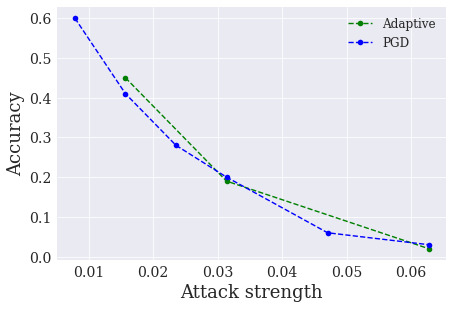

In [30]:
indices = [i for i in range(0, 4999+1, 50)]
subdir_list = analyze_utilities_v2.get_subdir_list(adaptive_diff_eps_path)
print(subdir_list)
df_adaptive = analyze_utilities_v2.results_dirs_to_df(subdir_list)
df_adaptive = df_adaptive.sort_values("epsilon", ignore_index=True).sort_values("epsilon", ignore_index=True)
subdir_list = analyze_utilities_v2.get_subdir_list(pgd_pnml_diff_eps_path)
df_pgd_pnml = analyze_utilities_v2.results_dirs_to_df(subdir_list, indices).sort_values("epsilon", ignore_index=True)

plt.figure(0)
plt.plot(df_adaptive['epsilon'], df_adaptive['acc'], 'go--', label='Adaptive')
plt.plot(df_pgd_pnml['epsilon'], df_pgd_pnml['acc'], 'bo--', label='PGD')
plt.legend(fontsize=12, ncol=1, loc=1)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(output_path, 'adaptive_vs_pgd.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()